# Predicting Home Prices in King County, WA 
## (Seattle Metropolitan Area and Points East)

#### <Jesse Markowitz's Working Notebook for Phase 2 Project>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
raw_df.shape

(21597, 21)

In [6]:
raw_df.condition.value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

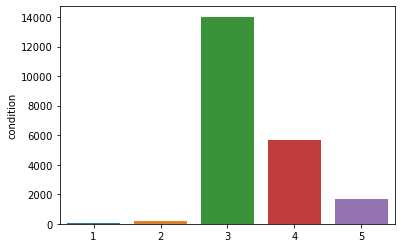

In [7]:
sns.barplot(x=raw_df.condition.value_counts().index, y=raw_df.condition.value_counts());

In [8]:
raw_df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

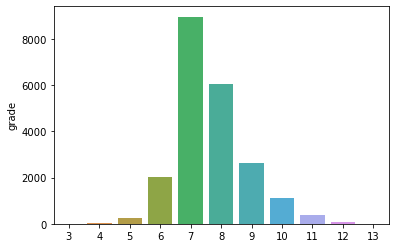

In [9]:
sns.barplot(x=raw_df.grade.value_counts().index, y=raw_df.grade.value_counts());

In [10]:
raw_df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

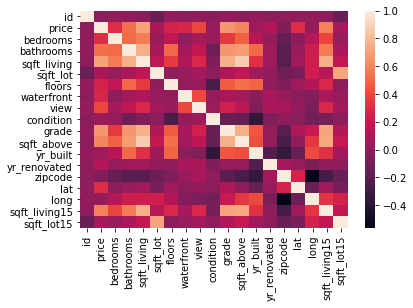

In [11]:
sns.heatmap(raw_df.corr());

## Stakeholder Priorities

Our stakeholders for this investigation are the homebuyers of King Country, WA. What do homebuyers care about?
 - LOCATION
 - sqft of living space, \# bedrooms/bathrooms
 - condition of the house
 - age of the house (historic vs new; historic vs old)
 - 

## Train-Test Split to create a df for EDA

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = raw_df['price']
X = raw_df.drop(labels=['price'], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)

We create a df to use for EDA by re-combining the `X_train` and `y_train` data, then dropping the `['id']` column and resetting the index:

In [15]:
eda_df = pd.concat([pd.DataFrame(y_train), X_train], axis=1).drop('id', axis=1).reset_index(drop=True)

In [16]:
display(eda_df.head())
print(eda_df.shape)

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,405000.0,4/3/2015,4,2.50,2620,9359,2.0,0.0,0.0,3,9,2620,0.0,1987,0.0,98058,47.4380,-122.152,2580,7433
1,631750.0,8/18/2014,3,1.75,2360,4063,1.0,0.0,0.0,5,7,1180,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063
2,452500.0,10/9/2014,3,2.50,2240,7791,2.0,0.0,0.0,3,7,2240,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018
3,4670000.0,6/17/2014,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
4,709000.0,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,8,1870,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200


(17277, 20)


In [17]:
eda_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.727700e+04,17277.000000,17277.000000,17277.000000,1.727700e+04,17277.000000,15356.000000,17232.000000,17277.000000,17277.000000,17277.000000,17277.000000,14195.000000,17277.000000,17277.000000,17277.000000,17277.000000,17277.000000
mean,5.403367e+05,3.374660,2.111333,2077.266192,1.503784e+04,1.491405,0.008075,0.237291,3.411646,7.654570,1784.938357,1970.874747,83.956252,98078.032818,47.559810,-122.214703,1987.588181,12637.828500
std,3.686163e+05,0.931114,0.766177,915.753595,4.099151e+04,0.540391,0.089500,0.771072,0.650234,1.167855,826.015132,29.354222,400.711193,53.478216,0.138647,0.140092,685.403769,25955.985544
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.240000e+05,3.000000,1.500000,1425.000000,5.026000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470900,-122.329000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1974.000000,0.000000,98065.000000,47.571400,-122.231000,1840.000000,7620.000000
75%,6.412500e+05,4.000000,2.500000,2550.000000,1.071600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,1997.000000,0.000000,98118.000000,47.677500,-122.126000,2360.000000,10101.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,560617.000000


In [18]:
eda_df.isna().sum()

price               0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1921
view               45
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3082
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [19]:
eda_df.loc[eda_df['waterfront'].isna()]['zipcode'].value_counts()

98115    55
98103    53
98059    53
98052    53
98042    52
         ..
98005     9
98070     7
98024     5
98039     4
98148     4
Name: zipcode, Length: 70, dtype: int64

In [20]:
eda_df.loc[eda_df['zipcode']==98070]['price']

156      528000.0
280      585000.0
337      445000.0
642      649000.0
898      340000.0
           ...   
15508    750000.0
16546    390000.0
16569    385000.0
16887    430000.0
17259    256500.0
Name: price, Length: 97, dtype: float64

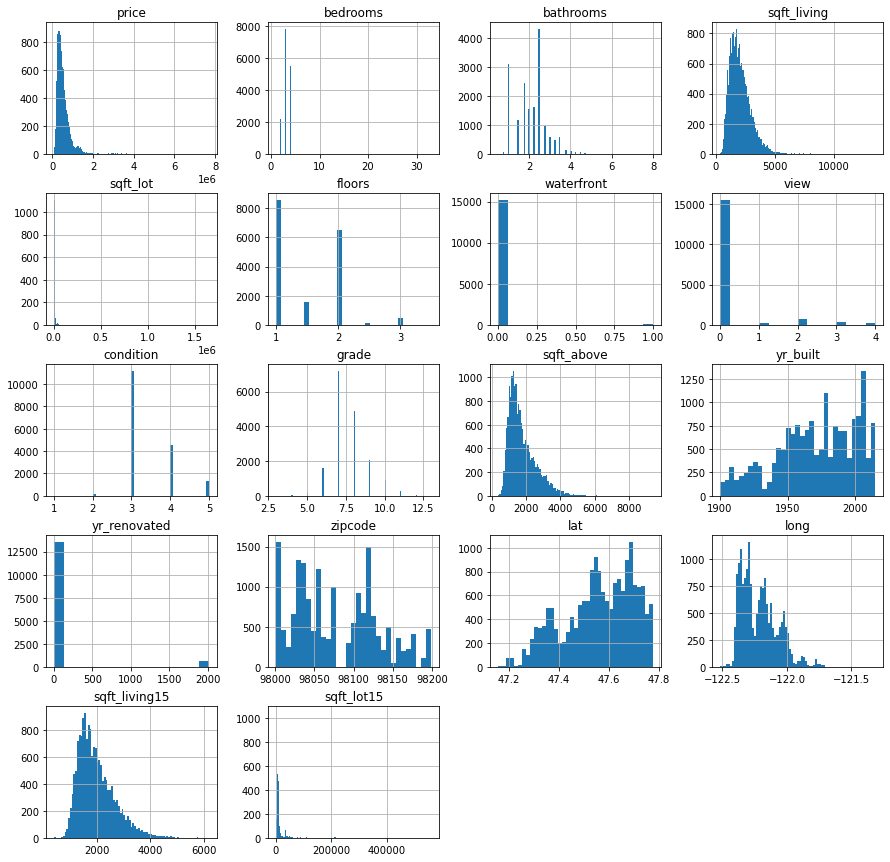

In [21]:
eda_df.hist(figsize=(15, 15), bins='auto');

**Notes on histograms and distributions:**
 - Price is right-skewed; outliers? (Normal distribution w/out outliers?) -->LOG TRANSFORM!
 - Bedrooms is skewed by extreme outlier (1 house has 33 bedrooms!)
 - sqft_basement has 350 '?' values; could turn into a binary {Basement:1, No basement:0} column
 - sqft_living right-skewed w/outliers  -->LOG TRANSFORM!
 - waterfront is 1 or 0
 - view is how many times it was viewed online? Or in-person visits (open-house)?
 - condition: maybe split into below avg (1,2), avg (3), above avg (4, 5)
 - grade: need to look up "King County grading system" to interpret; compare to condition? (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b; scroll to "Building Grade) -- refers to building standards and meeting code

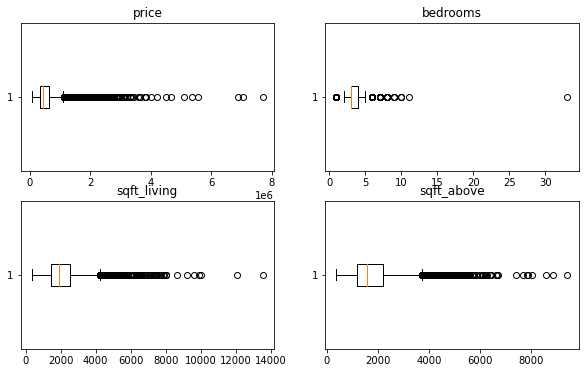

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
cols_to_plot = ['price', 'bedrooms', 'sqft_living', 'sqft_above']

for i, ax in enumerate(axs.flat):
    ax.set_title(cols_to_plot[i])
    ax.boxplot(eda_df[cols_to_plot[i]], vert=False)

fig.tight_layout;

**Other ideas:**
 - Split zip codes into Urban, Suburban, Rural; interaction w/size (Dillon)
 - Most basic model: simple linreg w/sqft_living (use as baseline model)
 - Interaction w/age and condition--is the house historic and well kept? Or is it old and run down?

In [23]:
eda_df.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.700923
grade            0.664625
sqft_above       0.604636
sqft_living15    0.585330
bathrooms        0.525356
view             0.392116
lat              0.307032
bedrooms         0.305913
waterfront       0.258042
floors           0.253709
yr_renovated     0.134954
sqft_lot         0.082496
sqft_lot15       0.079215
zipcode          0.057878
yr_built         0.050130
condition        0.037065
long             0.021214
Name: price, dtype: float64

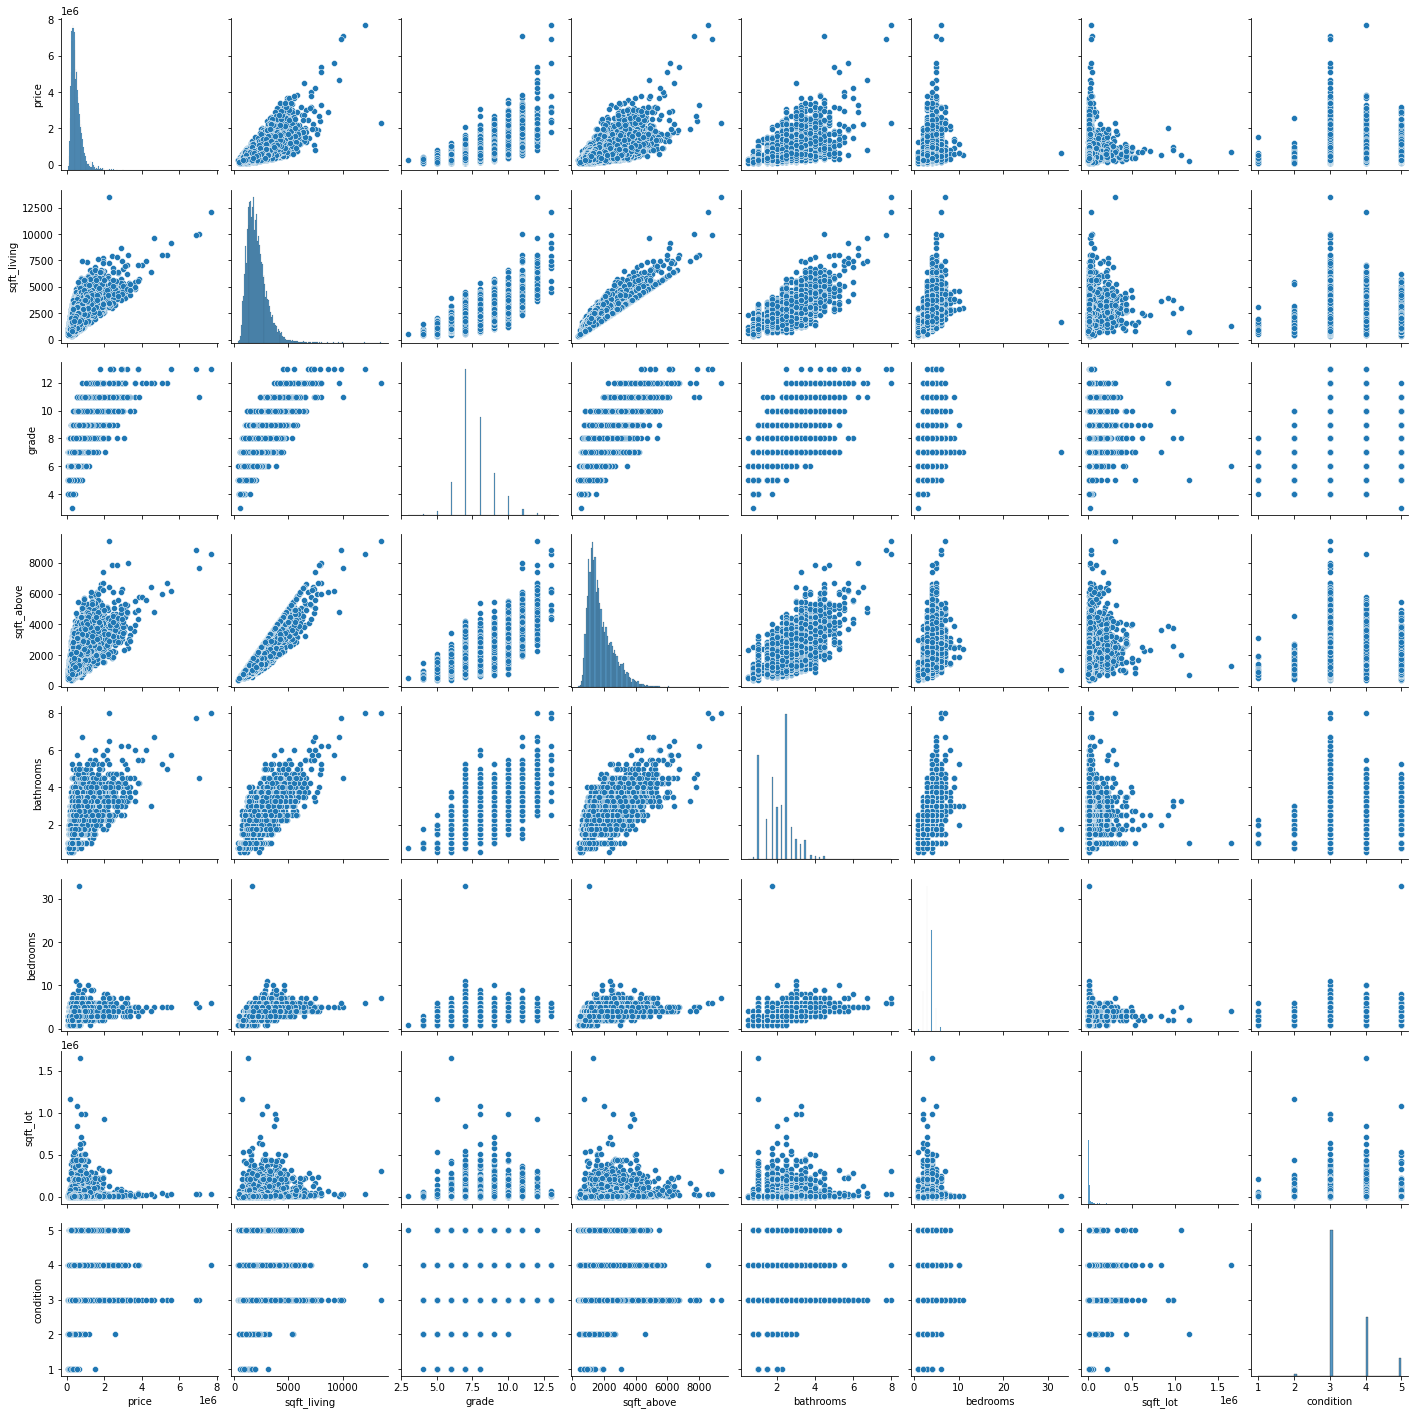

In [24]:
sns.pairplot(eda_df[['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms', 'sqft_lot', 'condition']]);

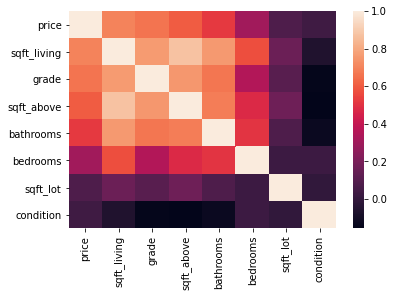

In [25]:
sns.heatmap(eda_df[['price', 'sqft_living', 'grade', 'sqft_above', 
                    'bathrooms', 'bedrooms', 'sqft_lot', 'condition']].corr());

## Baseline Model

Let's take a look at the simplest model: price and square footage of living space

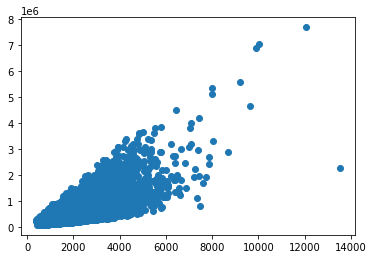

In [26]:
plt.scatter(x=eda_df.sqft_living, y=eda_df.price);

Definitely a positive correlation, but with heteroskedacity (right?)

In [27]:
import statsmodels.api as sm

In [28]:
baseline_model = sm.formula.ols(formula='price ~ sqft_living', data=eda_df).fit()

baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.668e+04
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:19:19   Log-Likelihood:            -2.4012e+05
No. Observations:               17277   AIC:                         4.803e+05
Df Residuals:                   17275   BIC:                         4.803e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.574e+04   4958.793     -9.225      0.000   -5.55e+04    -3.6e+04
sqft_living   282.1408      2.184    129.165      0.000     277.859     286.422
==============================================================================
Omnibus:                    12090.176   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           474100.489
Skew:                           2.885   Prob(JB):                         0.00
Kurtosis:                      28.006   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^2$ value is 0.491, which means that `sqft_living` explains just under half of the variation in `price`.

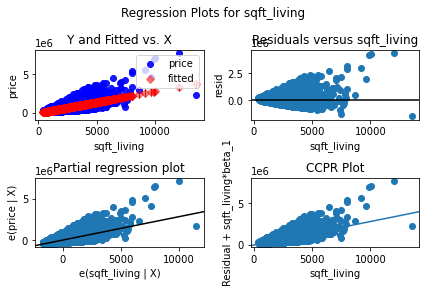

In [29]:
fig = sm.graphics.plot_regress_exog(baseline_model, "sqft_living")
fig.tight_layout(pad=1.0)

**Root Mean Squared Error:**

In [30]:
from statsmodels.tools.eval_measures import rmse

In [31]:
y_train_preds = baseline_model.predict(eda_df)
y_test_preds = baseline_model.predict(X_test)
baseline_train_rmse = rmse(y_train_preds, y_train)
baseline_test_rmse = rmse(y_test_preds, y_test)

print('Baseline rmse on training data: ', baseline_train_rmse)
print('Baseline rmse on testing data:  ', baseline_test_rmse)

Baseline rmse on training data:  262903.341514918
Baseline rmse on testing data:   256623.15488963886


According to our `rmse` calculation, our baseline model is, on average, about \$260,000 off on price predictions (although it did a little better on the testing data!). Yikes. I think we can do better.

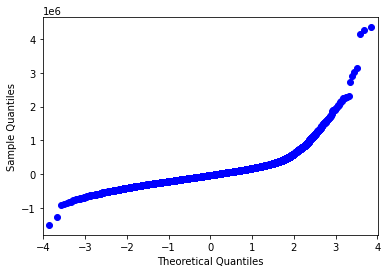

In [32]:
res = baseline_model.resid # residuals
fig = sm.qqplot(res)
plt.show()

### Log transformations

Both `price` and `sqft_living` are notably right-skewed. Let's log-transform these values and re-fit the model.

In [33]:
eda_log_df = pd.DataFrame([])
eda_log_df['log_price'] = np.log(eda_df['price'])
eda_log_df['log_sqft_living'] = np.log(eda_df['sqft_living'])

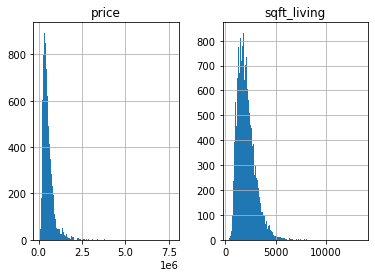

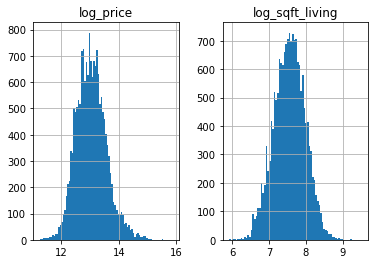

In [34]:
eda_df.hist(column=['price', 'sqft_living'], bins='auto');
eda_log_df.hist(bins='auto');

Clearly the log-transformed data has a more normal distribution. Now let's fit the model and compare $R^2$ and `rmse` values to the baseline.

In [35]:
log_transform_model = sm.formula.ols(formula='np.log(price) ~ np.log(sqft_living)', data=eda_df).fit()

log_transform_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                 1.426e+04
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:19:23   Log-Likelihood:                -8207.8
No. Observations:               17277   AIC:                         1.642e+04
Df Residuals:                   17275   BIC:                         1.644e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7488      0.053    127.736      0.000       6.645       6.852
np.log(sqft_living)     0.8344      0.007    119.422      0.000       0.821       0.848
==============================================================================
Omnibus:                       99.045   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.260
Skew:                           0.146   Prob(JB):                     9.25e-21
Kurtosis:                       2.793   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hold on, the $R^2$ value dropped from 0.491 to 0.452! Interesting...

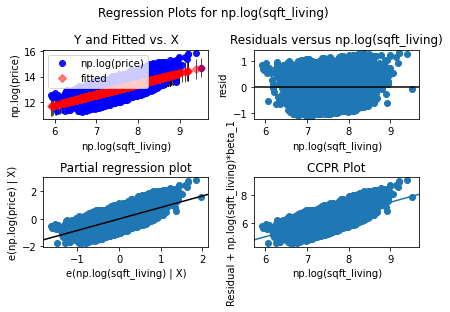

In [36]:
fig = sm.graphics.plot_regress_exog(log_transform_model, "np.log(sqft_living)")
fig.tight_layout(pad=1.0)

The residuals also reflect a more normalized distribution (the heteroskedacity from before is reduced).

Let's see what happened to the root mean square error:

In [37]:
X_test_log = pd.DataFrame([])
X_test_log['sqft_living'] = X_test['sqft_living']

In [38]:
def inverse_log_rmse(log_y_train_preds, y_train, log_y_test_preds, y_test):
    '''
    Docstring: 
    Function to run root mean sqare error comparison between training data and test data
    for log-transformed factors. Uses rmse() from statsmodels.
    
    Parameters:
    log_y_train_preds: array-like
        Predicted target values using training data
    y_train: array-like
        Expected target values from training data
    log_y_test_preds: array-like
        Predicted target values using testing data (unseen by model)
    y_test: array-like
        Expected target values from test data
    
    Dependecies:
    Uses rmse() from statsmodels.tools.eval_measures
    '''
    # Reverse the log-transformation
    y_train_preds_non_log = np.exp(log_y_train_preds)
    y_test_preds_non_log = np.exp(log_y_test_preds)
    
    # Calculate rmse
    train_rmse = rmse(y_train_preds_non_log, y_train)
    test_rmse = rmse(y_test_preds_non_log, y_test)
    
    return train_rmse, test_rmse

In [39]:
train_rmse, test_rmse = inverse_log_rmse(log_transform_model.predict(eda_df), y_train, 
                                         log_transform_model.predict(X_test_log), y_test)

print('Log rmse on training data: ', train_rmse)
print('Log rmse on testing data:  ', test_rmse)

Log rmse on training data:  281325.27746468876
Log rmse on testing data:   273024.95109660365


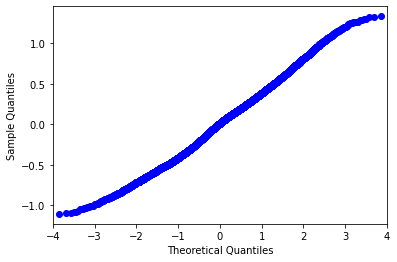

In [40]:
res = log_transform_model.resid # residuals
fig = sm.qqplot(res)
plt.show()

**Interpretation:**

The log transformation is beneficial to our model in that it reduces the heteroskedacity of our risiduals. Both $R^2$ and root mean square error suffered from this transformation ($R^2$ decreased while `rmse` increased!), but making a more complex model by adding factors will likely improve those metrics.

## Feature Engineering: Historic home? Or run down piece of garbage? ##

What makes a house "historic"? Surely more than just age; that quality and condition are likely to be important as well. Dillon had a great idea for a pseudo-formula:

 - old + good condition = "historic"
 - old + bad condition = "run down"
 
Let's see if this interaction yields any predictive power when it comes to price.

In [41]:
eda_df.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,405000.0,4/3/2015,4,2.50,2620,9359,2.0,0.0,0.0,3,9,2620,0.0,1987,0.0,98058,47.4380,-122.152,2580,7433
1,631750.0,8/18/2014,3,1.75,2360,4063,1.0,0.0,0.0,5,7,1180,1180.0,1940,0.0,98117,47.6902,-122.382,1660,4063
2,452500.0,10/9/2014,3,2.50,2240,7791,2.0,0.0,0.0,3,7,2240,0.0,2002,0.0,98065,47.5361,-121.880,2480,5018
3,4670000.0,6/17/2014,5,6.75,9640,13068,1.0,1.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
4,709000.0,2/24/2015,3,2.75,2780,7200,1.5,0.0,0.0,4,8,1870,910.0,1913,0.0,98118,47.5632,-122.270,1700,7200


First, let's construct another sub-DataFrame for this purpose.

In [42]:
historic_df = eda_df[['price', 'date', 'sqft_living', 'condition', 'yr_built', 'grade']]
historic_df.head()

,price,date,sqft_living,condition,yr_built,grade
0,405000.0,4/3/2015,2620,3,1987,9
1,631750.0,8/18/2014,2360,5,1940,7
2,452500.0,10/9/2014,2240,3,2002,7
3,4670000.0,6/17/2014,9640,3,1983,12
4,709000.0,2/24/2015,2780,4,1913,8


Convert the `date` column (currently a string) into a usable format. Then, extract the year to form a `year` column.

In [43]:
historic_df['date_sold'] = pd.to_datetime(historic_df['date'])
historic_df['year_sold'] = historic_df['date_sold'].dt.year.astype(int)

Now simply subtract `yr_built` from `year_sold` to calculate the age of the house when it was sold!

In [44]:
historic_df['age_sold'] = historic_df['year_sold'] - historic_df['yr_built']

In [45]:
historic_df.drop('date', axis=1, inplace=True)
historic_df.head()

,price,sqft_living,condition,yr_built,grade,date_sold,year_sold,age_sold
0,405000.0,2620,3,1987,9,2015-04-03,2015,28
1,631750.0,2360,5,1940,7,2014-08-18,2014,74
2,452500.0,2240,3,2002,7,2014-10-09,2014,12
3,4670000.0,9640,3,1983,12,2014-06-17,2014,31
4,709000.0,2780,4,1913,8,2015-02-24,2015,102


Let's check some things visually:

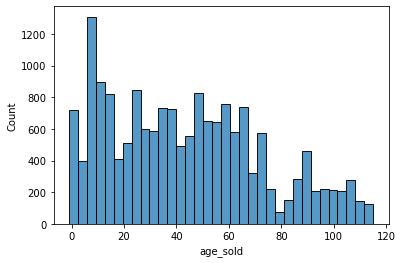

In [46]:
sns.histplot(historic_df.age_sold);

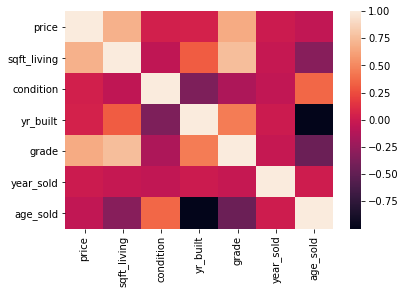

In [47]:
sns.heatmap(historic_df.corr());

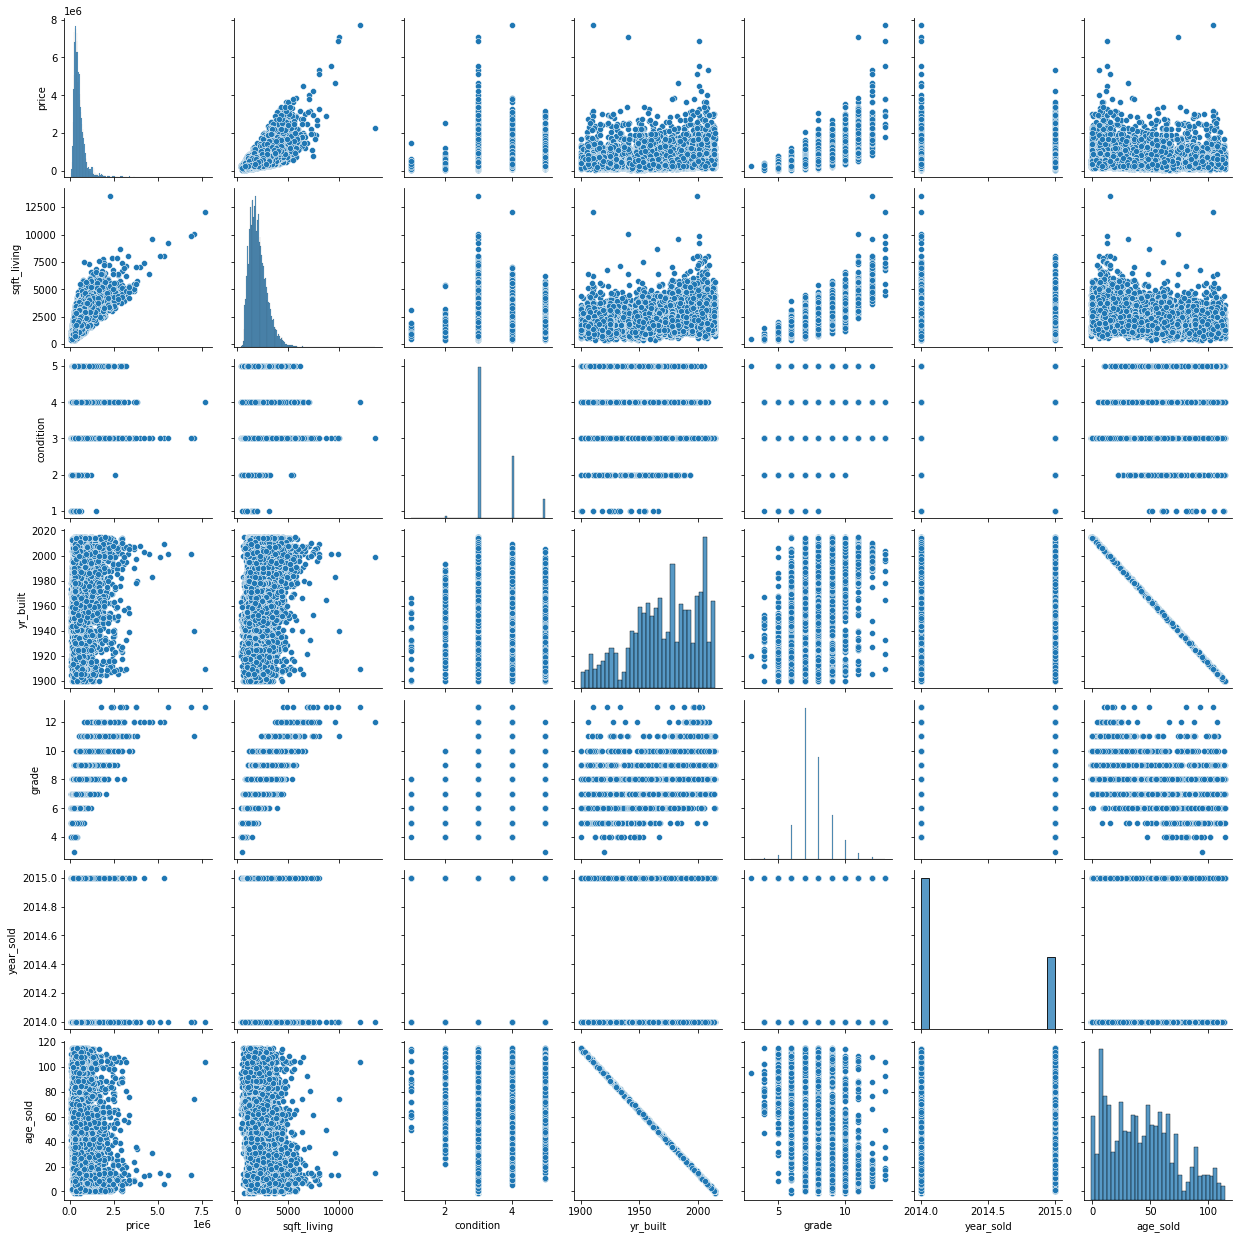

In [48]:
sns.pairplot(historic_df);

So far it looks like there isn't much of a correlation between `price` and `age_sold`. Let's see if using these factors improves the baseline model at all.

In [49]:
historic_model = sm.formula.ols(formula='np.log(price) ~ np.log(sqft_living) + grade + condition + age_sold', data=historic_df).fit()

historic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     7009.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:19:34   Log-Likelihood:                -5076.2
No. Observations:               17277   AIC:                         1.016e+04
Df Residuals:                   17272   BIC:                         1.020e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.4817      0.053    141.791      0.000       7.378       7.585
np.log(sqft_living)     0.4279      0.009     48.876      0.000       0.411       0.445
grade                   0.2613      0.003     78.898      0.000       0.255       0.268
condition               0.0328      0.004      7.994      0.000       0.025       0.041
age_sold                0.0052     0.0001     51.748      0.000       0.005       0.005
==============================================================================
Omnibus:                       31.997   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.971
Skew:                          -0.036   Prob(JB):                     5.68e-09
Kurtosis:                       3.218   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Definitely better than the baseline model: We went from an $R^2$ of 0.491 to 0.619! Let's check the rmse:

In [50]:
X_historic_test = X_test[['date', 'sqft_living', 'condition', 'yr_built', 'grade']]
X_historic_test['date_sold'] = pd.to_datetime(X_test['date'])
X_historic_test['year_sold'] = X_historic_test['date_sold'].dt.year.astype(int)
X_historic_test['age_sold'] = X_historic_test['year_sold'] - X_historic_test['yr_built']
X_historic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4320 entries, 15393 to 10060
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4320 non-null   object        
 1   sqft_living  4320 non-null   int64         
 2   condition    4320 non-null   int64         
 3   yr_built     4320 non-null   int64         
 4   grade        4320 non-null   int64         
 5   date_sold    4320 non-null   datetime64[ns]
 6   year_sold    4320 non-null   int64         
 7   age_sold     4320 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 303.8+ KB


In [51]:
train_rmse, test_rmse = inverse_log_rmse(historic_model.predict(historic_df), historic_df['price'], 
                                         historic_model.predict(X_historic_test), y_test)

print('Rmse on training data: ', train_rmse)
print('Rmse on testing data:  ', test_rmse)

Rmse on training data:  222382.3198538704
Rmse on testing data:   216391.22179429326


The multiple linear regression has also improved on our rmse, bringing our predicted prices closer to the actual prices by $30k.

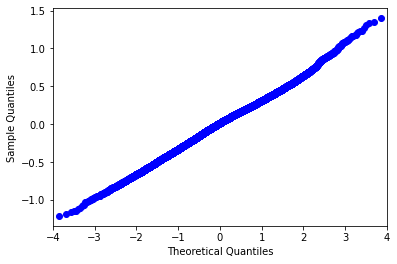

In [52]:
res = historic_model.resid # residuals
fig = sm.qqplot(res)
plt.show()

### Interactions

Now let's try interactions between `age_sold` and `grade` and `age_sold` and `condition` in order to truly test the idea that old homes in good conditions are higher-priced "historic" homes, while old homes in poor condition are just run down and not worth as much.

In [53]:
historic_df['grade*age_sold'] = historic_df['grade'] * historic_df['age_sold']
historic_df['condition*age_sold'] = historic_df['condition'] * historic_df['age_sold']
historic_df.head()

,price,sqft_living,condition,yr_built,grade,date_sold,year_sold,age_sold,grade*age_sold,condition*age_sold
0,405000.0,2620,3,1987,9,2015-04-03,2015,28,252,84
1,631750.0,2360,5,1940,7,2014-08-18,2014,74,518,370
2,452500.0,2240,3,2002,7,2014-10-09,2014,12,84,36
3,4670000.0,9640,3,1983,12,2014-06-17,2014,31,372,93
4,709000.0,2780,4,1913,8,2015-02-24,2015,102,816,408


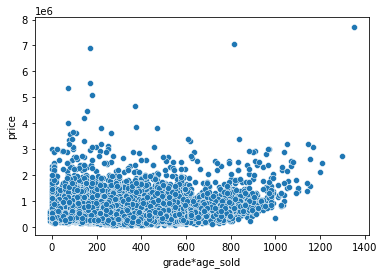

In [54]:
sns.scatterplot(historic_df['grade*age_sold'], historic_df['price']);

It kind of looks like the floor lifts toward the right side--starting around 800 on the x-axis.

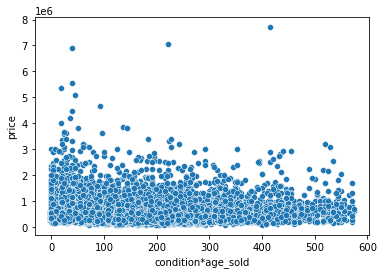

In [55]:
sns.scatterplot(historic_df['condition*age_sold'], historic_df['price']);

Looks like the slimmest of negative correlations.

In [56]:
formula = 'np.log(price) ~ np.log(sqft_living) + grade + condition + age_sold + grade*age_sold + condition*age_sold'
historic_interaction_model = sm.formula.ols(formula=formula, 
                                            data=historic_df).fit()

historic_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     4728.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:19:35   Log-Likelihood:                -5012.5
No. Observations:               17277   AIC:                         1.004e+04
Df Residuals:                   17270   BIC:                         1.009e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.7715      0.069    113.054      0.000       7.637       7.906
np.log(sqft_living)     0.4270      0.009     48.767      0.000       0.410       0.444
grade                   0.2641      0.004     60.789      0.000       0.256       0.273
condition              -0.0622      0.010     -6.416      0.000      -0.081      -0.043
age_sold                0.0007      0.001      0.922      0.357      -0.001       0.002
grade:age_sold         -0.0001   7.61e-05     -1.660      0.097      -0.000    2.29e-05
condition:age_sold      0.0016      0.000     10.960      0.000       0.001       0.002
==============================================================================
Omnibus:                       38.112   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.429
Skew:                          -0.019   Prob(JB):                     5.02e-11
Kurtosis:                       3.254   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
y_historic_interaction_preds = historic_interaction_model.predict(historic_df)
y_historic_interaction_preds_unlog = np.exp(y_historic_interaction_preds)

rmse_val = rmse(y_historic_interaction_preds_unlog, y_train)

print(f'RMSE = ', rmse_val)

RMSE =  222380.81096222225


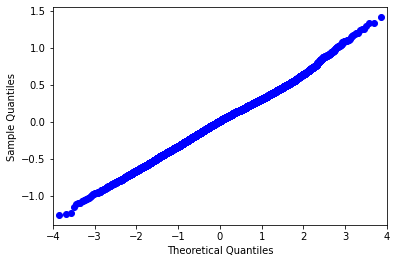

In [58]:
res = historic_interaction_model.resid # residuals
fig = sm.qqplot(res)
plt.show()

Well, not much of a difference after all. And it appears that `age_sold` isn't even a statistically significant factor, although it was above...

### Binning `condition`

Let's see what happens if we bin `condition` into three: Below average (score: 1-2), Average (score: 3) and Above Average (score: 4-5). Average will be dropped/treated as a default (not in data) to avoid collinearity issues.

In [59]:
historic_df['good_condition'] = 0
historic_df['bad_condition'] = 0

In [60]:
historic_df['good_condition'] = np.where(historic_df['condition'] > 3, 1, 0)
historic_df['bad_condition'] = np.where(historic_df['condition'] < 3, 1, 0)

In [61]:
historic_df.condition.value_counts()

3    11197
4     4562
5     1363
2      134
1       21
Name: condition, dtype: int64

Now let's do a multiple regression using these columns. 

In [62]:
formula = 'np.log(price) ~ np.log(sqft_living) + grade + age_sold + condition'
historic_condition_model = sm.formula.ols(formula=formula, 
                                            data=historic_df).fit()

historic_condition_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     7009.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:19:36   Log-Likelihood:                -5076.2
No. Observations:               17277   AIC:                         1.016e+04
Df Residuals:                   17272   BIC:                         1.020e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.4817      0.053    141.791      0.000       7.378       7.585
np.log(sqft_living)     0.4279      0.009     48.876      0.000       0.411       0.445
grade                   0.2613      0.003     78.898      0.000       0.255       0.268
age_sold                0.0052     0.0001     51.748      0.000       0.005       0.005
condition               0.0328      0.004      7.994      0.000       0.025       0.041
==============================================================================
Omnibus:                       31.997   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.971
Skew:                          -0.036   Prob(JB):                     5.68e-09
Kurtosis:                       3.218   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This seems like another dead end. The $R^2$ value dropped slightly and `bad_condition` isn't even statistically significant. There aren't that many houses in `bad_condition` anyway. According to https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r, "Building Condition" is already relative to age and grade, so this variable is unlikely to yield much if any explanatory or predicting power to the model and may suffer from colinearity issues.

In [63]:
y_train_preds = historic_condition_model.predict(historic_df)
y_train_preds_nonlog = np.exp(y_train_preds)

rmse_train = rmse(y_train_preds_nonlog, y_train)
print(f'Training rmse: ', rmse_train)

Training rmse:  222382.31985386883


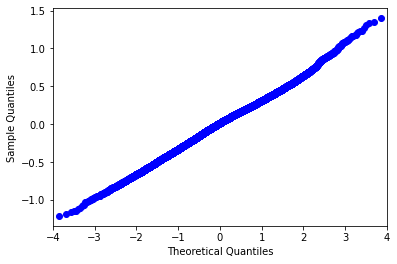

In [64]:
res = historic_condition_model.resid # residuals
fig = sm.qqplot(res)
plt.show()

## More visualizations

Using viz to explain our selection of factors to include in the final model.

In [65]:
historic_df.age_sold.describe()

count    17277.000000
mean        43.447474
std         29.355982
min         -1.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: age_sold, dtype: float64

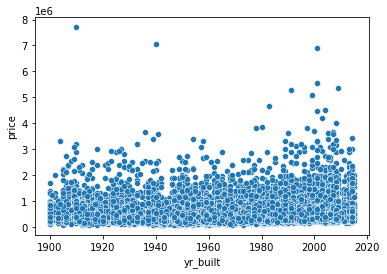

In [66]:
sns.scatterplot(x=raw_df['yr_built'], y=raw_df['price']);

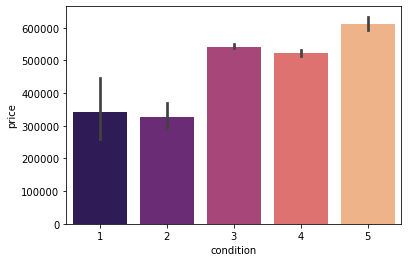

In [67]:
sns.barplot(x=raw_df['condition'], y=raw_df['price'], palette='magma');

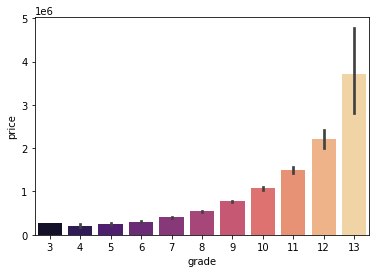

In [68]:
sns.barplot(x='grade', y='price', data=raw_df, palette='magma');

In [69]:
bins = [1900, 1920, 1940, 1960, 1980, 2000, 2020]

raw_df['yr_built_bins'] = pd.cut(raw_df['yr_built'], bins)

In [70]:
raw_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_built_bins
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,"(1940, 1960]"
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,"(1940, 1960]"
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,"(1920, 1940]"
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,"(1960, 1980]"
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,"(1980, 2000]"


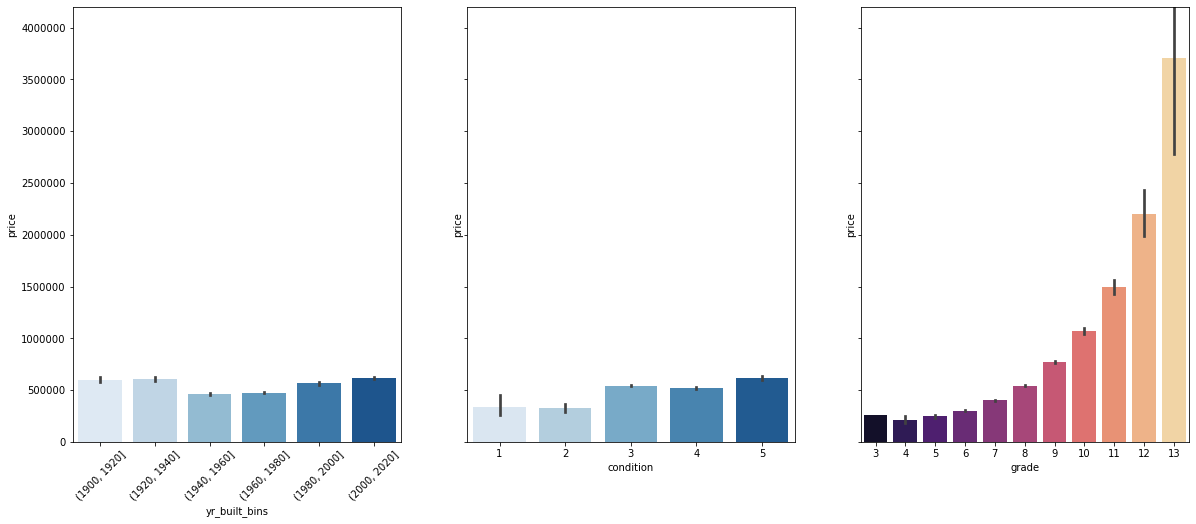

In [71]:
# from numpy import median
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8), sharey=True)

# sns.scatterplot(x='yr_built', y='price', data=raw_df.loc[raw_df['price']<4000000], ax=ax1)
sns.barplot(x='yr_built_bins', y='price', data=raw_df, palette='Blues', ax=ax1)
ax1.tick_params(axis='x', labelrotation=45)
sns.barplot(x='condition', y='price', data=raw_df, palette='Blues', ax=ax2)
sns.barplot(x='grade', y='price', data=raw_df, palette='magma', ax=ax3)
# ax3.ticklabel_format(useOffset=False, style='plain')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylim(0, 4200000)
plt.tight_layout;

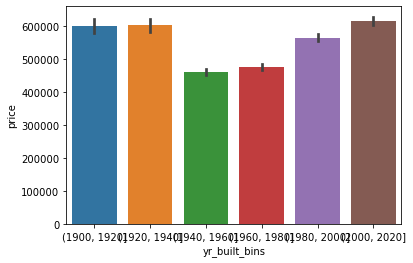

In [72]:
sns.barplot(x='yr_built_bins', y='price', data=raw_df);

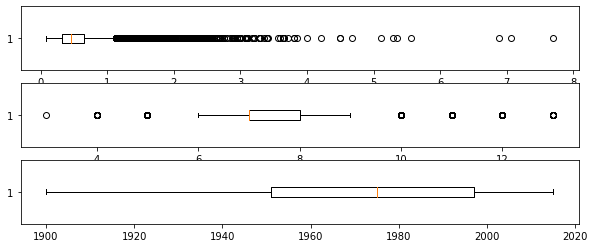

In [73]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,4))

ax1.boxplot(raw_df['price'], vert=False)
ax2.boxplot(raw_df['grade'], vert=False)
ax3.boxplot(raw_df['yr_built'], vert=False);